<a href="https://colab.research.google.com/github/koyorhythm/RW2025/blob/main/SVM_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVMを用いたIris データセットの分類と可視化

## 環境設定とデータ準備

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# データセットの読み込みと前処理
iris = load_iris()
X, y = iris.data, iris.target

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# データの標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVMモデルの構築と評価

In [ ]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel, C=1.0, degree=3, gamma='scale'):
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)
    else:
        svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    return svm

# 異なるカーネルでSVMを訓練・評価
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel)

## ハイパーパラメータCの影響分析

In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"C: {C}, Accuracy: {score:.2f}")
    accuracies.append(score) # この後の可視化のため，正解率をストック

# 一応可視化
plt.plot(C_values, accuracies)
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs C value (Iris dataset)')
plt.show()

In [1]:
from sklearn.datasets import fetch_olivetti_faces

# データセット取得
faces = fetch_olivetti_faces(shuffle=True)
X, y = faces.data, faces.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# データの前処理（標準化）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


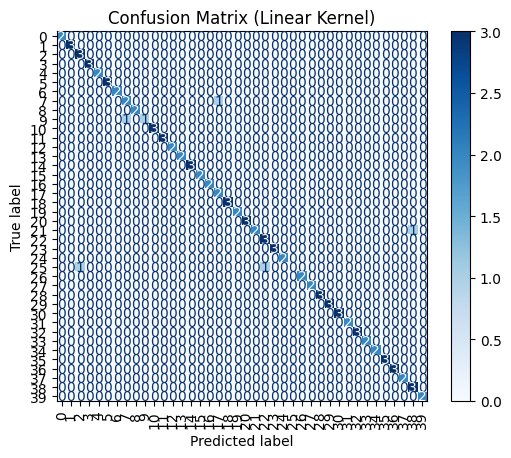

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 線形カーネル SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_scaled, y_train)
y_pred = svm_linear.predict(X_test_scaled)

# 評価
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 混同行列の表示
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix (Linear Kernel)")
plt.show()

In [4]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f"\n=== Kernel: {kernel} ===")
    svm = SVC(kernel=kernel, C=1.0, degree=3)  # degreeはpoly用
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



=== Kernel: linear ===
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3
           8       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17

C = 0.1, Accuracy = 0.36
C = 10, Accuracy = 0.93
C = 100, Accuracy = 0.93


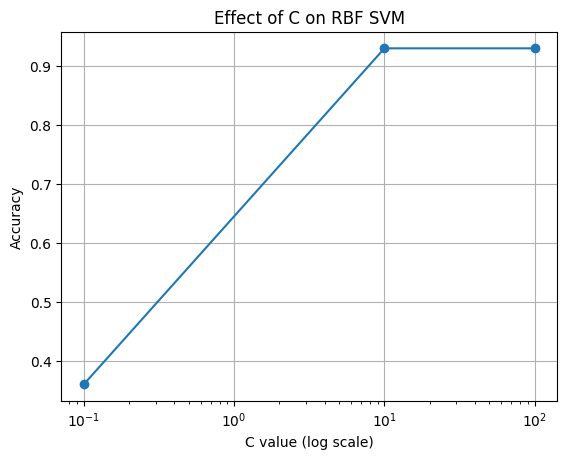

In [5]:
C_values = [0.1, 10, 100]
accuracies = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"C = {C}, Accuracy = {acc:.2f}")

# 可視化
plt.figure()
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of C on RBF SVM')
plt.grid(True)
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV

# グリッドパラメータ設定
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1]
}

# RBF SVM + グリッドサーチ
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# 最良モデルの評価
print("Best Parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'C': 10, 'gamma': 'scale'}
Accuracy on Test Set: 0.93
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
